# ANZ Dataset

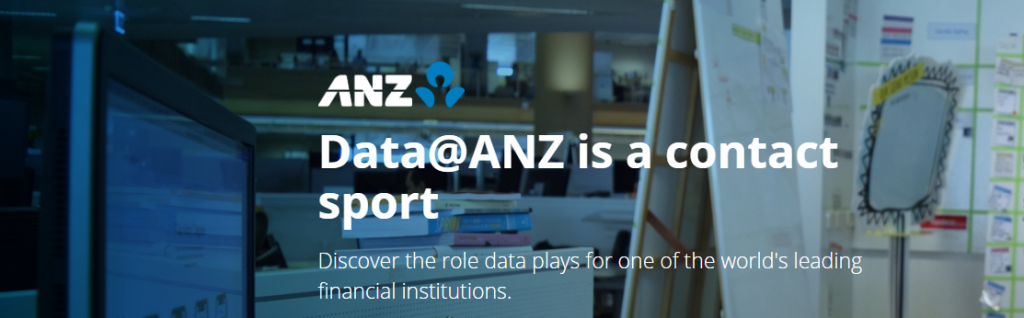

In [37]:
im1 = Image.open('ANZ.png')
im1

## Business Understanding

Task 1: Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

## The Dataset

The synthesised transaction dataset contains 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

## Objectives

#### Import required libraries
#### Load dataset
#### Basic data cleaning
#### Feaature engineering
#### Exploratory Data Analysis

    - Correct outliers
    - Daily transactions
    - Customers transactions
    - Average balance & amount of customers
    - Average amount & balance by month
    - Age analysis
    - Transaction volume per day or week
    - Transaction parttern per hour of the day
    - Location

#### Conclusion

## Import required libraries

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)

import datetime as dt
from tabulate import tabulate

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {'xtick.direction': 'in'})

from PIL import Image

import warnings 
warnings.filterwarnings('ignore')

## Load Data

In [3]:
data= pd.read_excel('ANZ synthesised transaction dataset.xlsx', parse_dates=['date','extraction'])
# data.set_index('date',inplace=True)

print(f'The ANZ synthesised transaction dataset has: \n{data.shape[0]} rows and \n{data.shape[1]} columns ')
data.head()

The ANZ synthesised transaction dataset has: 
12043 rows and 
23 columns 


,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


## Data Cleansing

In [4]:
# Checking for missing values

percent_missing = round(data.isnull().mean()*100,2)
print('Percentage of missing values by columns :\n ')
print(percent_missing.sort_values(ascending=False)[:10])

Percentage of missing values by columns :
 
merchant_code        92.67
bpay_biller_code     92.65
card_present_flag    35.92
merchant_state       35.92
merchant_suburb      35.92
merchant_id          35.92
merchant_long_lat    35.92
movement              0.00
first_name            0.00
account               0.00
dtype: float64


In [5]:
def treat_outlier(col,upper_quatile=0.55,lower_quatile=0.05):
    max_thres= data[col].quantile(upper_quatile)
    min_thres= data[col].quantile(lower_quatile)
    transformed = data[(data[col]<max_thres) & (data[col]>min_thres)]
    return transformed

age_tran= treat_outlier('age',0.95, 0.05)
bal_tran= treat_outlier('balance',0.5)
amt_tran= treat_outlier('amount',0.5)

## Feature Engineering

In [6]:
# Customer Long & Lat
data[['long','lat']] = data['long_lat'].str.split(" -",expand=True)
data['lat']= data['lat'].astype('float')
data['long']= data['long'].astype('float')

# merchant_long_lat
data[['m_long','m_lat']] = data['merchant_long_lat'].str.split(" -",expand=True)
data['m_lat']= data['m_lat'].astype('float')
data['m_long']= data['m_long'].astype('float')

In [7]:
data['month']= data['extraction'].dt.strftime('%B')
data['weekday']= data['extraction'].dt.strftime('%a')

In [8]:
data['time']= data['extraction'].dt.time
data['time']= data['time'].astype('str')
data[['hr','min','sec']]= data['time'].str.split(':', expand=True)

In [9]:
data= data.drop(['long_lat','min','sec','extraction',
                 'merchant_long_lat','merchant_id','account',
                 'bpay_biller_code','card_present_flag',
                 'transaction_id'], axis=1)

In [10]:
data.head(2)

,status,currency,txn_description,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,country,customer_id,movement,long,lat,m_long,m_lat,month,weekday,time,hr
0,authorized,AUD,POS,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,Australia,CUS-2487424745,debit,153.41,27.95,153.38,27.99,August,Wed,01:01:15,01
1,authorized,AUD,SALES-POS,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,14.19,Australia,CUS-2487424745,debit,153.41,27.95,151.21,33.87,August,Wed,01:13:45,01


## Exploratory Data Analysis

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   status           12043 non-null  object        
 1   currency         12043 non-null  object        
 2   txn_description  12043 non-null  object        
 3   merchant_code    883 non-null    float64       
 4   first_name       12043 non-null  object        
 5   balance          12043 non-null  float64       
 6   date             12043 non-null  datetime64[ns]
 7   gender           12043 non-null  object        
 8   age              12043 non-null  int64         
 9   merchant_suburb  7717 non-null   object        
 10  merchant_state   7717 non-null   object        
 11  amount           12043 non-null  float64       
 12  country          12043 non-null  object        
 13  customer_id      12043 non-null  object        
 14  movement         12043 non-null  objec

#### Date

Total transaction per day is shown on the graph below 

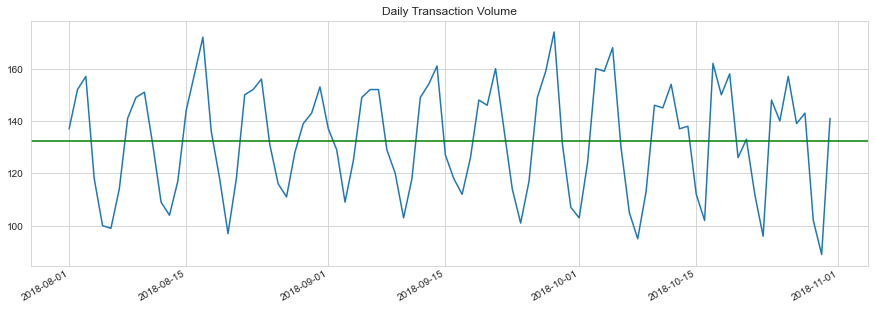

In [12]:
# Transaction Volume per day

count_daily= data['date'].value_counts()

plt.figure(figsize=(15,5))
count_daily.plot()
plt.axhline(y=count_daily.mean(), color='g', linestyle='-')
plt.title('Daily Transaction Volume')


plt.show()

In [13]:
print('Average number of transaction per day',count_daily.mean())

Average number of transaction per day 132.34065934065933


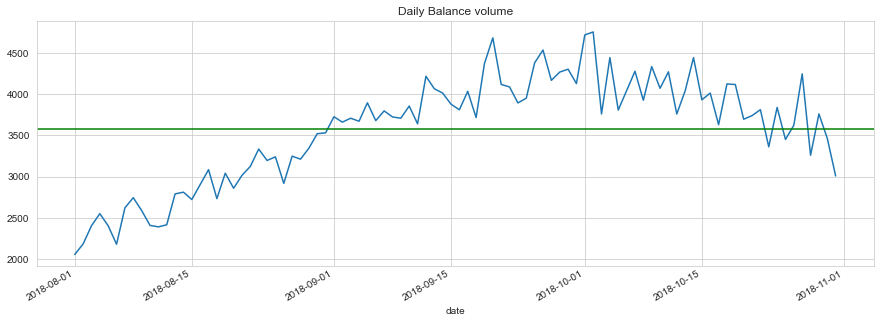

In [14]:
plt.figure(figsize=(15,5))

daily_balance_mean= bal_tran.groupby('date')['balance'].mean()
daily_balance_mean.plot()
plt.axhline(y=daily_balance_mean.mean(), color='g', linestyle='-')
plt.title('Daily Balance volume')


plt.show()

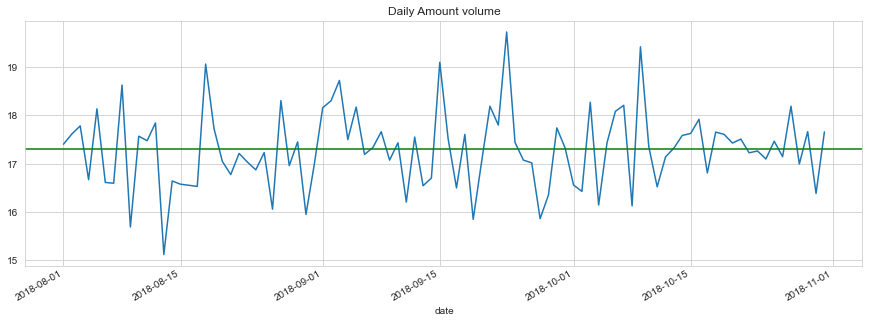

In [15]:
plt.figure(figsize=(15,5))

daily_amount_mean= amt_tran.groupby('date')['amount'].mean()
daily_amount_mean.plot()
plt.axhline(y=daily_amount_mean.mean(), color='g', linestyle='-')
plt.title('Daily Amount volume')


plt.show()

#### Total sum of transactions for Balance & Amount

In [16]:
trans_daily= data.groupby('date')[['balance','amount']].agg(['sum','mean'])
trans_daily.head()

balance                  amount            
                   sum          mean       sum        mean
date                                                      
2018-08-01  1360954.62   9933.975328  29867.94  218.014161
2018-08-02  2122469.92  13963.617895  21786.32  143.331053
2018-08-03  1599482.51  10187.786688  38096.58  242.653376
2018-08-04   968403.51   8206.809407   6296.05   53.356356
2018-08-05  1329752.54  13297.525400   4426.50   44.265000

#### Customer

Total number of unique customers are 100


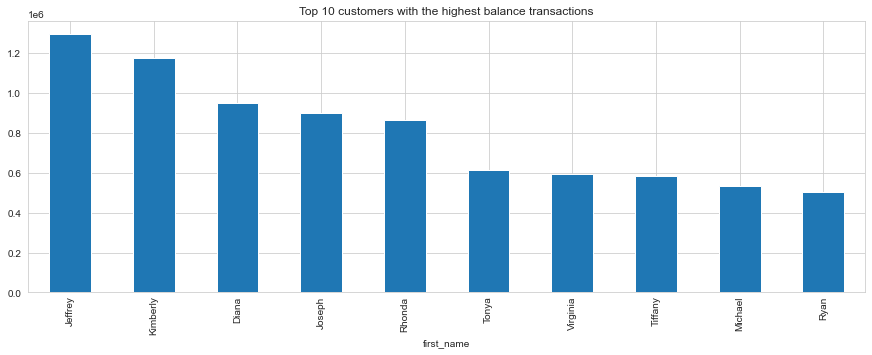

In [17]:
print(f'Total number of unique customers are {data.customer_id.nunique()}')

plt.figure(figsize=(15,5))

cust_bal= bal_tran.groupby('first_name')['balance'].sum()
cust_bal.sort_values(ascending=False)[:10].plot(kind='bar')

plt.title('Top 10 customers with the highest balance transactions')
plt.show()

Total number of unique customers are 100


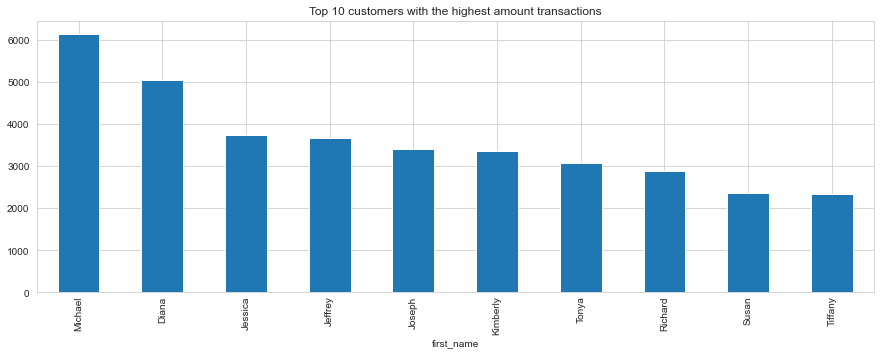

In [18]:
print(f'Total number of unique customers are {data.customer_id.nunique()}')

plt.figure(figsize=(15,5))

cust_amt= amt_tran.groupby('first_name')['amount'].sum()
cust_amt.sort_values(ascending=False)[:10].plot(kind='bar')

plt.title('Top 10 customers with the highest amount transactions')
plt.show()

Total number of unique customers are 100


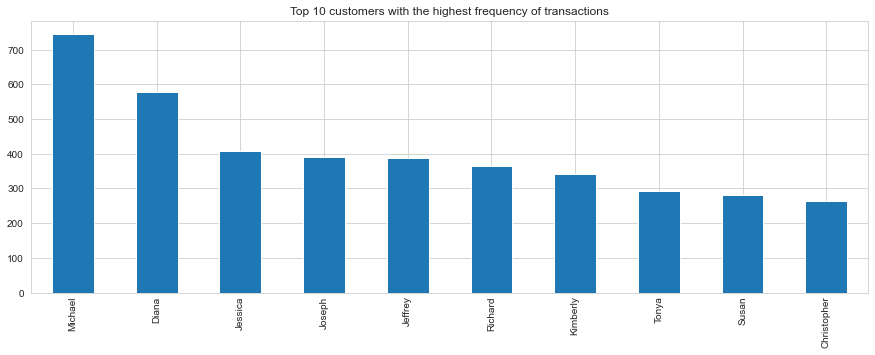

In [19]:
print(f'Total number of unique customers are {data.customer_id.nunique()}')

plt.figure(figsize=(15,5))

cust_tran= data['first_name'].value_counts()
cust_tran.sort_values(ascending=False)[:10].plot(kind='bar')

plt.title('Top 10 customers with the highest frequency of transactions')
plt.show()

#### Balance & Amount

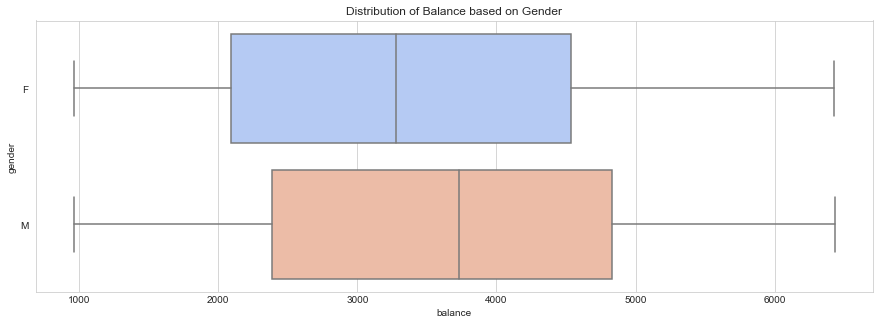

In [20]:
# Balance

plt.figure(figsize=(15,5))
sns.boxplot(x='balance', y='gender', data=bal_tran, palette ='coolwarm')
plt.title('Distribution of Balance based on Gender')

plt.show()

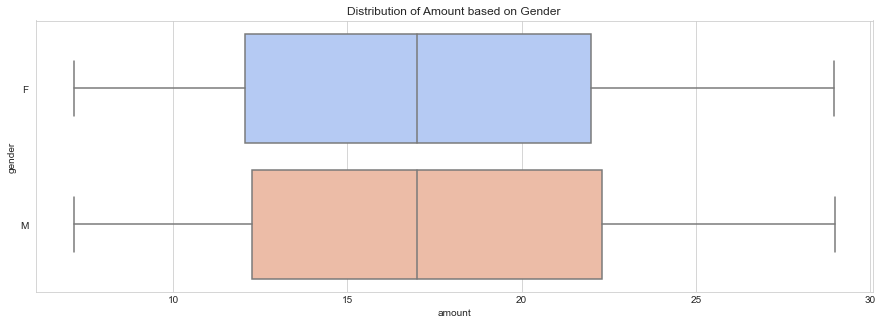

In [21]:
# Amount
amt_tran= treat_outlier('amount',0.5)

plt.figure(figsize=(15,5))
sns.boxplot(x='amount', y='gender', data=amt_tran, palette ='coolwarm')
plt.title('Distribution of Amount based on Gender')


plt.show()

#### Age

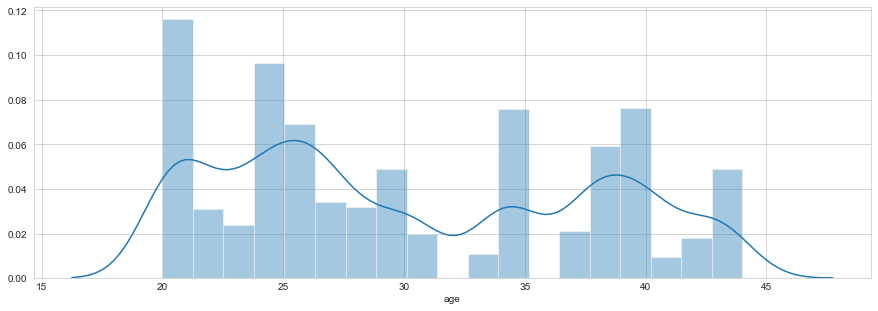

In [22]:
plt.figure(figsize=(15,5))
sns.distplot(age_tran.age)

plt.show()

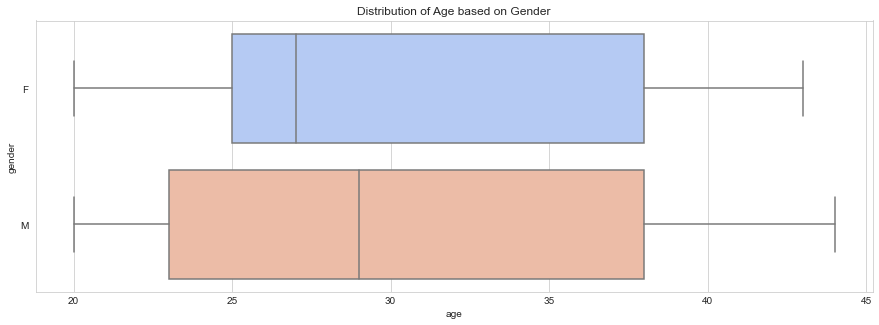

In [23]:
plt.figure(figsize=(15,5))

sns.boxplot(data=age_tran, y='gender', x='age', palette ='coolwarm')
plt.title('Distribution of Age based on Gender')


plt.show()

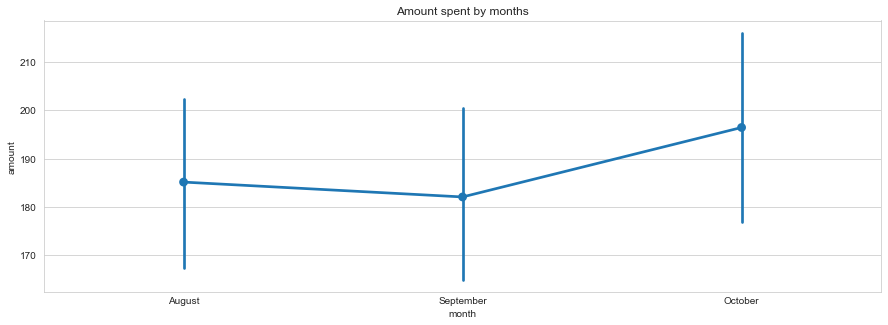

In [24]:
plt.figure(figsize=(15,5))

sns.pointplot(x='month', y='amount', data=data)
plt.title('Amount spent by months')

plt.show()

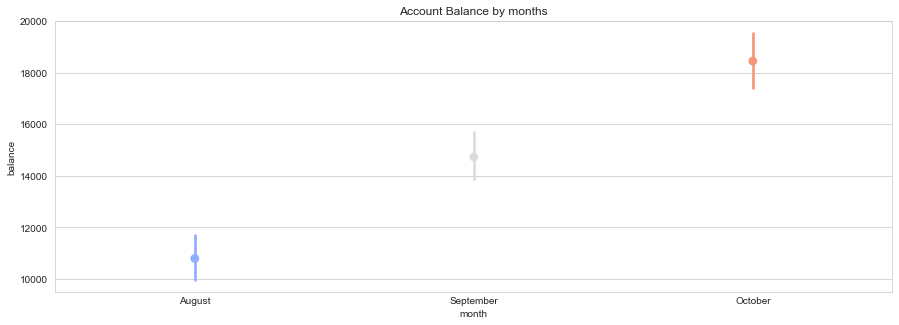

In [25]:
plt.figure(figsize=(15,5))

sns.pointplot(x='month', y='balance', data=data, palette='coolwarm')
plt.title('Account Balance by months')

plt.show()

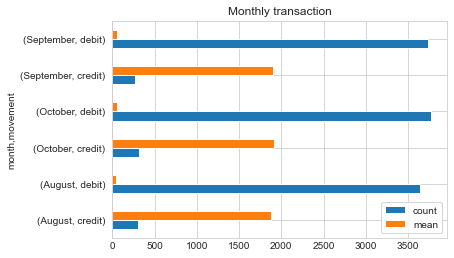

In [26]:
# transaction amount per month

data.groupby(['month','movement'])['amount'].agg(['count','mean']).plot(kind='barh')
plt.title('Monthly transaction')

plt.show()

In [27]:
data.weekday.unique()

array(['Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue'], dtype=object)

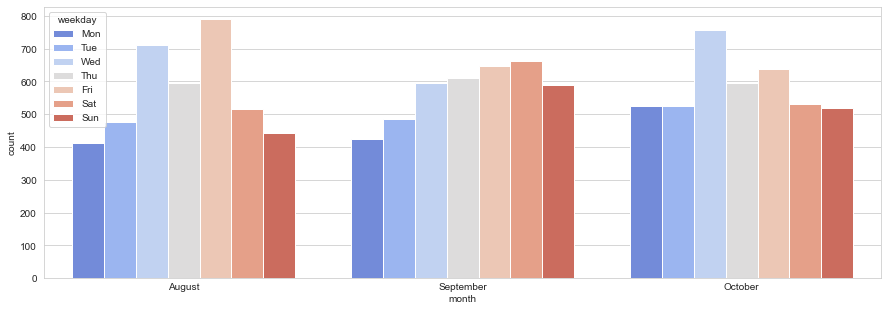

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x='month',data=data, hue='weekday', hue_order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], palette='coolwarm')

plt.show()

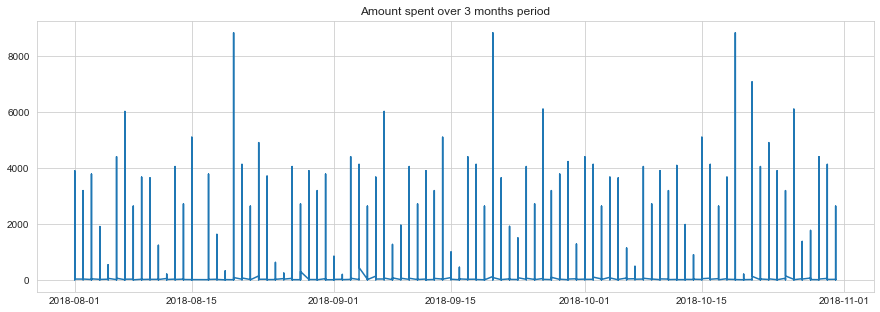

In [29]:
plt.figure(figsize=(15,5))

plt.plot(data.date,data.amount)
plt.title('Amount spent over 3 months period')

plt.show()

#### Location

In [30]:
lat_tran= treat_outlier('lat',0.95,0.05)
m_lat_tran= treat_outlier('m_lat',0.75,0.25)

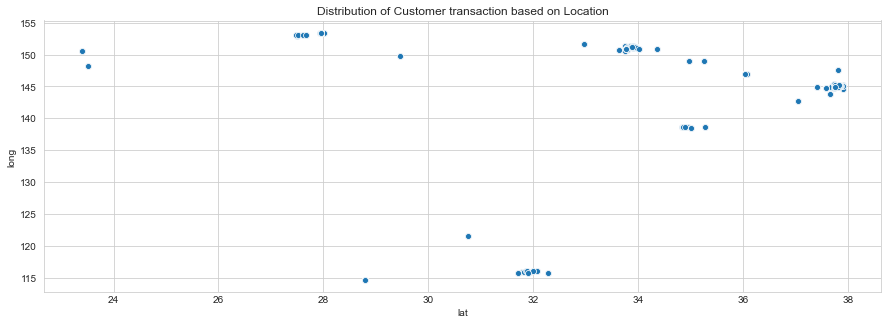

In [31]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='lat',y='long', data=lat_tran )
# sns.scatterplot(x='m_lat',y='m_long', data=m_lat_tran, hue='movement' )
plt.title('Distribution of Customer transaction based on Location')


plt.show()

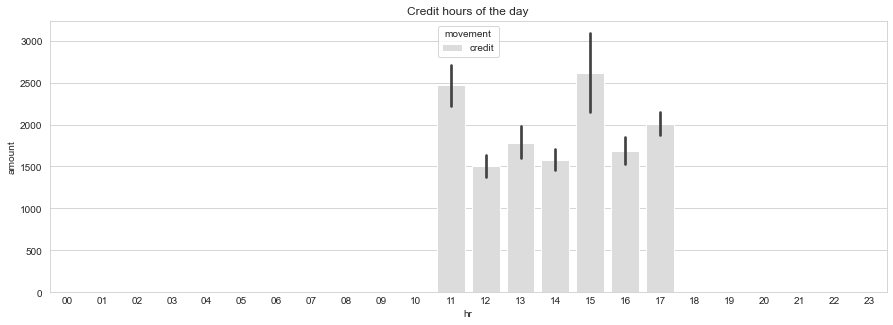

In [32]:
plt.figure(figsize=(15,5))
tran_hr= data[data['movement']=='credit']
sns.barplot(x=data.hr, y='amount', hue='movement', data=tran_hr, palette ='coolwarm')
plt.title('Credit hours of the day')

plt.show()

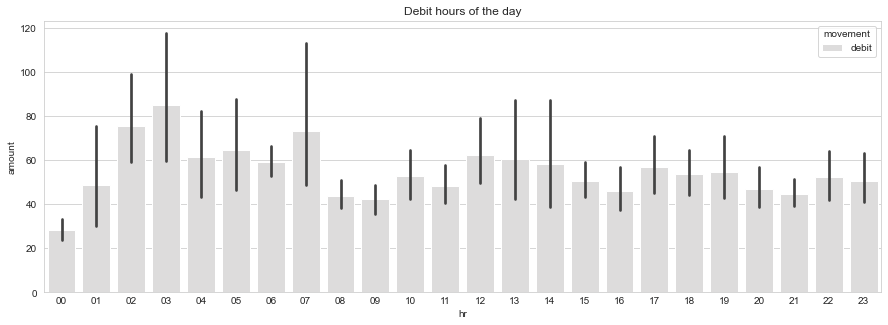

In [33]:
plt.figure(figsize=(15,5))

tran_hr= data[data['movement']=='debit']
sns.barplot(x='hr', y='amount', hue='movement', data=tran_hr, palette ='coolwarm')
plt.title('Debit hours of the day')

plt.show()

## Conclusion

In [34]:
print(tabulate([['Average no transaction',count_daily.mean()],
                ['Average amount', daily_amount_mean.mean()],
               ['Average balance',daily_balance_mean.mean()]], 
               headers=['Info (Daily)', 'Summary']))

Info (Daily)              Summary
----------------------  ---------
Average no transaction   132.341
Average amount            17.3028
Average balance         3583.26


In [35]:
print(tabulate([['Customer with Highest balance',cust_bal.sort_values(ascending=False)[:1].index[0],round(cust_bal.sort_values(ascending=False)[0],2)],
                ['Customer with Highest amount', cust_amt.sort_values(ascending=False)[:1].index[0],round(cust_amt.sort_values(ascending=False)[0],2)],
               ['Customer with most reoccuring transaction',cust_tran.sort_values(ascending=False)[:1].index[0], round(cust_tran.sort_values(ascending=False)[0],2)]], 
               headers=['Info ', 'Customer','value']))

Info                                       Customer             value
-----------------------------------------  ----------  --------------
Customer with Highest balance              Jeffrey        1.29679e+06
Customer with Highest amount               Michael     6158.21
Customer with most reoccuring transaction  Michael      746


In [36]:
print(tabulate([['Credit transaction occurs :','11:00 - 17:00'],
                ['Most Transaction occured  :', 'October'],
               [' Balance growth            :','Upward Trend']], 
               headers=['Info', 'Summary']))

Info                         Summary
---------------------------  -------------
Credit transaction occurs :  11:00 - 17:00
Most Transaction occured  :  October
Balance growth            :  Upward Trend


### Thank you....